In [1]:
# pip install tpot

In [2]:
import time
start_time = time.time()

from sklearn.model_selection import train_test_split
from tpot import TPOTClassifier
import time
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

In [3]:
# azureml-core of version 1.0.72 or higher is required
# azureml-dataprep[pandas] of version 1.1.34 or higher is required
from azureml.core import Workspace, Dataset

subscription_id = '2f5a6780-2fed-47cc-a89a-efd6b03243cc'
resource_group = 'ml_for_ccfd'
workspace_name = 'ml_for_ccfd_ws'

workspace = Workspace(subscription_id, resource_group, workspace_name)

dataset = Dataset.get_by_name(workspace, name='Capstone_CCFD')
df=dataset.to_pandas_dataframe()

In [4]:
problem_type = 'binary'
target_column = 'Class'  

X = df.drop(columns=[target_column])
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [5]:
tpot = TPOTClassifier(generations=5, population_size=20, verbosity=1, random_state=42)

tpot.fit(X_train, y_train)
end_time = time.time()

num_samples_test = len(y_test)
print(f"Number of samples in the test set: {num_samples_test} \n")

Workflow_Runtime = end_time - start_time
print(f"\nAutoML Workflow Runtime: {Workflow_Runtime:.2f} seconds")

Best pipeline: ExtraTreesClassifier(input_matrix, bootstrap=False, criterion=gini, max_features=0.4, min_samples_leaf=1, min_samples_split=6, n_estimators=100)
Number of samples in the test set: 56962 


AutoML Workflow Runtime: 10464.44 seconds


In [6]:
start_time = time.time()
y_predicted = tpot.predict(X_test)
end_time = time.time()

precision = precision_score(y_test, y_predicted)
recall = recall_score(y_test, y_predicted)
f1 = f1_score(y_test, y_predicted)

confusion_matrix_result = confusion_matrix(y_test, y_predicted)

num_samples_test = len(y_test)
print(f"Number of samples in the test set: {num_samples_test} \n")

print("Evaluation Metrics on Test Data:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}\n")

print("Confusion Matrix:")
print(confusion_matrix_result)

Prediction_Time = end_time - start_time
print(f"\nPrediction Time: {Prediction_Time:.2f} seconds")

Number of samples in the test set: 56962 

Evaluation Metrics on Test Data:
Precision: 0.9506
Recall: 0.7857
F1-Score: 0.8603

Confusion Matrix:
[[56860     4]
 [   21    77]]

Prediction Time: 0.61 seconds


Number of samples in the test set: 56962 


Prediction Time: 0.61 seconds


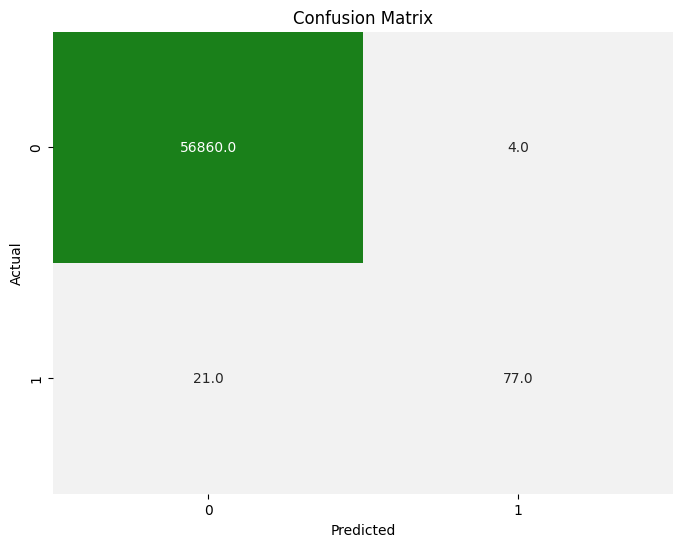

In [7]:
num_samples_test = len(y_test)
print(f"Number of samples in the test set: {num_samples_test} \n")

Prediction_Time = end_time - start_time
print(f"\nPrediction Time: {Prediction_Time:.2f} seconds")

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from matplotlib.colors import LinearSegmentedColormap

plt.rcParams['font.sans-serif'] = 'DejaVu Sans'

TN = confusion_matrix_result[0][0]
TP = confusion_matrix_result[1][1]
FP = confusion_matrix_result[0][1]
FN=confusion_matrix_result[1][0]

confusion_matrix_data = np.array([[TN, FP], [FN, TP]])
tn, fp, fn, tp = confusion_matrix_data.ravel()

accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * (precision * recall) / (precision + recall)

fig, ax = plt.subplots(figsize=(8, 6))

colors = [(0.95, 0.95, 0.95), (0.1, 0.5, 0.1)]
cmap = LinearSegmentedColormap.from_list('Custom', colors, len(colors))

sns.heatmap(confusion_matrix_data, annot=True, fmt='.1f', cmap=cmap, ax=ax, cbar=False)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')

plt.show()